In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#读入数据
data = np.loadtxt('ex1data2.txt', delimiter=',')

#初始化数据
cols = data.shape[1]
X = data[:,0:cols-1]
m = len(X)
y = data[:, cols-1].reshape(m, 1)
theta = np.zeros((cols, 1))


iterations = 500
alpha = 0.01
theta_record = np.zeros((iterations,theta.shape[0]))

In [3]:
# Feature Normalization
X = (X - np.mean(X, axis = 0))/X.std(axis = 0)
y = (y - np.mean(y, axis = 0))/y.std(axis = 0)

X = np.insert(X, 0, 1, 1)

In [4]:
# 代价计算
def computeCost(X, y, theta, m):
    J_theta=np.sum(np.power((np.dot(X,theta)-y), 2))/(2*m)
    return J_theta

In [5]:
# Gradient Descent
def gradientDescent(X, y, theta, m, iterations, alpha):
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iterations)
    for i in range(iterations):
        error = np.dot(X,theta)-y
        for j in range(theta.shape[0]):
            temp[j,0] = theta[j,0] - alpha*np.sum(np.multiply(error,X[:,j].reshape(m, 1)))/m
        theta = temp
        cost[i] = computeCost(X, y, theta ,m)
        theta_record[i,:] = theta.T
    return theta, cost

In [6]:
theta_g, cost = gradientDescent(X, y, theta, m, iterations, alpha)
theta_g

matrix([[-1.07691633e-16],
        [ 8.32902280e-01],
        [-1.63557870e-03]])

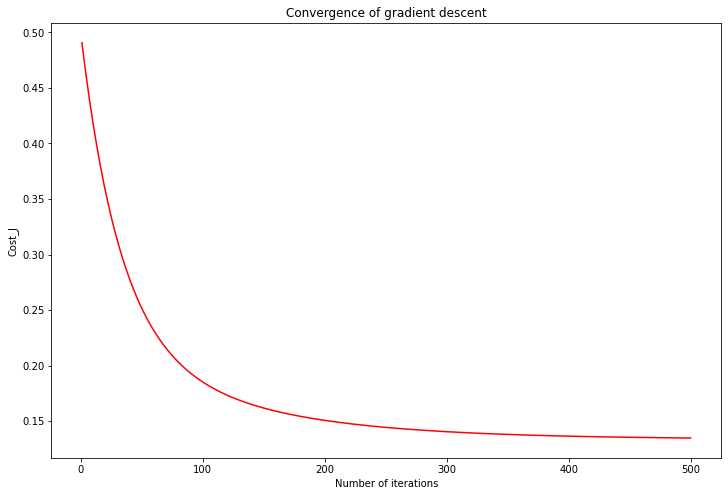

In [7]:
iteras = np.linspace(1, iterations, iterations)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(iteras, cost, 'r', label='Prediction')
ax.set_ylabel('Cost_J')
ax.set_xlabel('Number of iterations')
ax.set_title('Convergence of gradient descent')
plt.show()

In [8]:
# Normal Equations
def normalEqn(X, y):
    theta = np.dot(np.linalg.pinv(np.dot(X.T,X)), np.dot(X.T, y))#np.linalg.pinv()求伪逆
    return theta
normalEqn(X, y)

array([[ 2.39822220e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])

In [9]:
computeCost(X, y, normalEqn(X, y), m)

0.13352749098554287

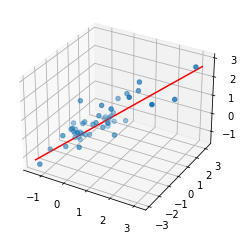

In [43]:

x1 = np.linspace(X[:,1].min(), X.max(), 100)
x2 = np.linspace(X[:,2].min(), X.max(), 100)


f = theta_g[0, 0] + (theta_g[1, 0] * x1) + (theta_g[2, 0] * x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:,1],X[:,2],y, cmap='Blues')
ax.plot3D(x1, x2, f,'red')    #绘制空间曲线